### Titanic Survival Classification:
Here we work with **Titanic** dataset labeled as `titanic.csv`. The aim is to build a model which **classifies passengers' Survival Status**, based on their features. We will use **Logistic Regression**, assuming there is a linear relationship between the features and the log-odds of survival, then further expand to more advanced models:

We follow the following steps to fit a Logistic Regression Model to the `titanic.csv` dataset:
- Explore `titanic_df` and gain domain knowledge on the data 
- Select a number of features to include in your model - e.g. `'Age'`, `'Sex'`, `'Pclass`, `'Fare'`, `'Embarked'`
- Ensure the data has **no missing values** post Feature Selection
- Split the data into training data and test data
- Conduct all necessary **data pre-processing** on the features, thinking about Normalisation or z-score Standardisation for Numerical features and Ordinal Encoding or One-Hot Encoding for Categorical features
- Train, Test and Evaluate a Logistic Regression Model with the selected features 
- Interpretation of the results

In [58]:
# Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, Binarizer


In [59]:
# Loading the dataset:

filepath = r'./Data/titanic.csv'
titanic_df = pd.read_csv(filepath)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
# Feature Selection and Cleaning Missing Data:

titanic_df = titanic_df[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Survived']]
titanic_df.dropna(axis = 0, inplace=True)
display(titanic_df)

,Age,Fare,Pclass,Sex,Embarked,Survived
0,22.0,7.2500,3,male,S,0
1,38.0,71.2833,1,female,C,1
2,26.0,7.9250,3,female,S,1
3,35.0,53.1000,1,female,S,1
4,35.0,8.0500,3,male,S,0
...,...,...,...,...,...,...
885,39.0,29.1250,3,female,Q,0
886,27.0,13.0000,2,male,S,0
887,19.0,30.0000,1,female,S,1
889,26.0,30.0000,1,male,C,1


We want to predict whether a not a person survived or not based on a set of input features. Before we carry out the train-test split, we need to drop the `Survived` column from the feature set, and create a new dataframe that includes just that column to be used for classification.

In [61]:
# Train/Test Split:

X = titanic_df.drop(columns = ['Survived'])
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)


Since we have a mix of Numerical and Categorical Data, we need to use some encoding to make them feasible features for the model to be trained on:

In [62]:
# Data Pre-processing with a Column Transformer - Fit-Transform Workflow
Column_Transformer_Titanic = ColumnTransformer(
    [
        ('Scale', MinMaxScaler(), ['Age', 'Fare']),
        ('OHE', OneHotEncoder(), ['Sex', 'Pclass', 'Embarked'])
    ],
    remainder = 'drop'
)

Column_Transformer_Titanic.fit(X_train)

X_transform_titanic_train = pd.DataFrame(Column_Transformer_Titanic.transform(X_train), columns = Column_Transformer_Titanic.get_feature_names_out())
X_transform_titanic_test = pd.DataFrame(Column_Transformer_Titanic.transform(X_test), columns = Column_Transformer_Titanic.get_feature_names_out())

display(X_transform_titanic_train)


,Scale__Age,Scale__Fare,OHE__Sex_female,OHE__Sex_male,OHE__Pclass_1,OHE__Pclass_2,OHE__Pclass_3,OHE__Embarked_C,OHE__Embarked_Q,OHE__Embarked_S
0,0.394933,0.015330,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.445355,0.051505,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.306694,0.081157,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.495777,0.018494,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.344510,0.024691,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
564,0.142821,0.021942,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
565,0.319299,0.015713,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
566,0.105004,0.091543,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
567,0.810916,0.051822,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


Accuracy Score (Logistic Regression): 0.7832
Precision Score (Logistic Regression): 0.7843137254901961
Recall Score (Logistic Regression): 0.6666666666666666
F1-Score (Logistic Regression): 0.7207207207207207
ROC AUC Score(Logistic Regression):0.7670682730923695


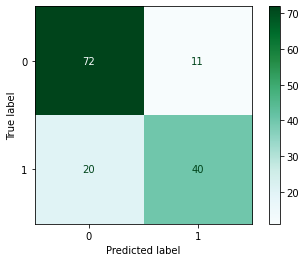

In [63]:
# Logistic Regression:
LogisticRegressionModel = LogisticRegression()

LogisticRegressionModel.fit(X_transform_titanic_train, y_train)

y_pred = LogisticRegressionModel.predict(X_transform_titanic_test)
y_pred_proba = LogisticRegressionModel.predict_proba(X_transform_titanic_test)
y_pred_proba_DF = pd.DataFrame(y_pred_proba)

# Model Evaluation - Metrics
AccuracyScoreLogisticRegression = accuracy_score(y_test,y_pred)
PrecisionScoreLogisticRegression = precision_score(y_test, y_pred)
RecallScoreLogisticRegression = recall_score(y_test, y_pred)
F1ScoreLogisticRegression = f1_score(y_test, y_pred)
ROC_AUC_SCORE_LogisticRegression = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score (Logistic Regression): {AccuracyScoreLogisticRegression:.4f}')
print(f'Precision Score (Logistic Regression): {PrecisionScoreLogisticRegression}')
print(f'Recall Score (Logistic Regression): {RecallScoreLogisticRegression}')
print(f'F1-Score (Logistic Regression): {F1ScoreLogisticRegression}')
print(f'ROC AUC Score(Logistic Regression):{ROC_AUC_SCORE_LogisticRegression}')

# Plotting the Confusion Matrix
fig, ax = plt.subplots()
g1 = ConfusionMatrixDisplay.from_predictions( y_test, y_pred, ax = ax, cmap = 'BuGn')

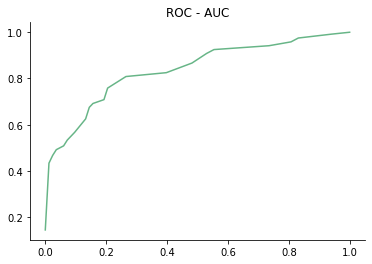

In [64]:
# Plotting the ROC Curve
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_DF[1])

g2 = sns.lineplot(x = fpr, y= tpr, color = '#67B587', errorbar=None)
g2.set_title('ROC - AUC')
sns.despine()
plt.show()

---
We have calculated and displayed how well a **Logistic Regression Model** performs on this dataset. We can further improve our model selection process by trying out several other models. The aim is to build an effective predictive model, which can identify which passengers are most at risk of not surviving the disaster


---


We can read in the original `titanic.csv` file and carry out relevant transformations before fitting models to the data. Note that, Decision Trees, Random Forests amd XGBoost don't require Re-scaling or One Hot Encoding, so we do not need to do that feature step for this process, unlike before.

In [65]:
# Loading the original titanic.csv data:

filepath2 = r'./Data/titanic.csv'
titanic_df2 = pd.read_csv(filepath2)
display(titanic_df2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
# Data Cleaning and Encoding of Categorical Features

titanic_df2.dropna(axis = 0, inplace=True)
titanic_df2['Sex'] = titanic_df2['Sex'].map({'female':1, 'male':0})
titanic_df2['Embarked'] = titanic_df2['Embarked'].map({'S':0, 'C':1, 'Q':2})
titanic_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,0


---
We want to use a few advance models, namely: Decision Trees, Random Forest, and XGBoost. To do this, we employ the following feature set: {`Pclass`, `Sex`, `Age`, `Fare`, `Embarked`}. Our target variable is `Survived` as before.

- We want to train each model, and carry out Hyperparameter Tuning to find the most optimal value of the model coefficients using GridSearchCV. 
- Depending on what metric needs to optimised, we follow the following syntax:
    - If you want to maximise Recall, use `GridSearchCV(estimator, param_grid, cv, scoring = 'recall')

---
#### Decision Tree Classification - without GridSearchCV

Accuracy Score (Decision Tree): 0.7568
Precision Score (Decision Tree): 0.8695652173913043
Recall Score (Decision Tree): 0.7692307692307693
F1 Score (Decision Tree): 0.8163265306122449
ROC AUC Score (Decision Tree): 0.7482517482517482


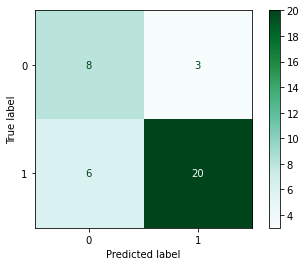

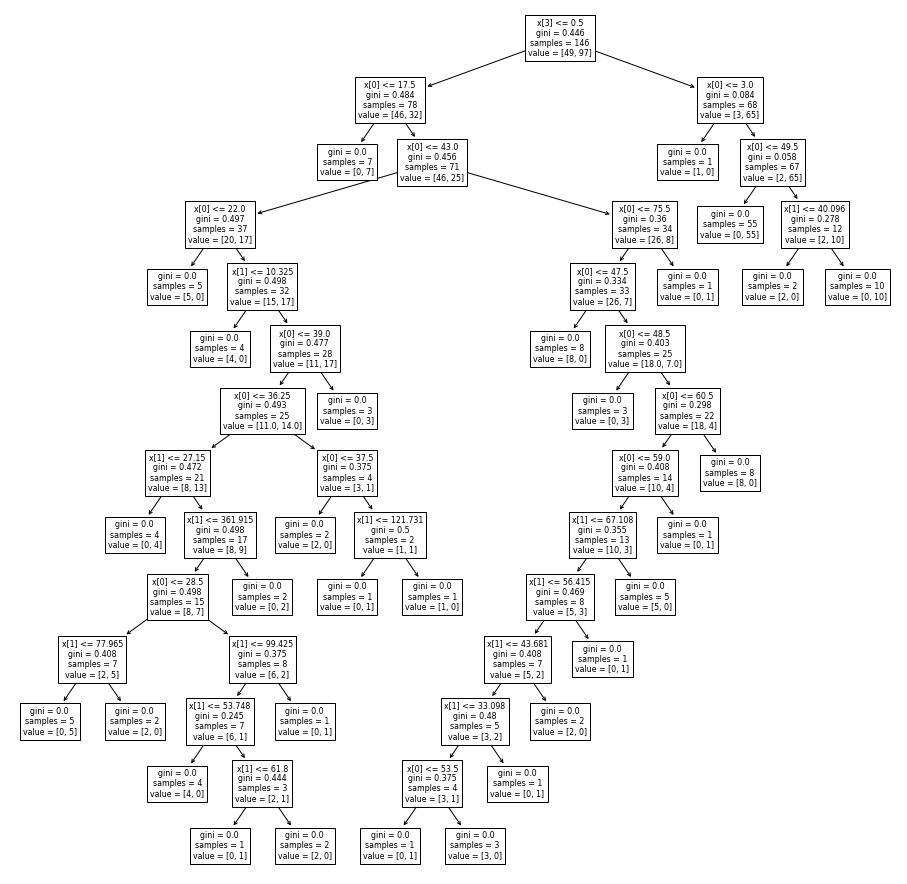

In [67]:
# Feature Selection and Train/Test split

X = titanic_df2[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']]
y = titanic_df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Initialise Decision Tree Classifier
DecisionTreeClassification = DecisionTreeClassifier()

# Fit and Predict
DecisionTreeClassification.fit(X_train, y_train)
y_pred = DecisionTreeClassification.predict(X_test)

# 4) Evaluate model performance
AccuracyScoreDecisionTree = accuracy_score(y_test,y_pred)
PrecisionScoreDecisionTree = precision_score(y_test, y_pred)
RecallScoreDecisionTree = recall_score(y_test, y_pred)
F1ScoreDecisionTree = f1_score(y_test, y_pred)
ROC_AUC_SCORE_DecisionTree = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score (Decision Tree): {AccuracyScoreDecisionTree:.4f}')
print(f'Precision Score (Decision Tree): {PrecisionScoreDecisionTree}')
print(f'Recall Score (Decision Tree): {RecallScoreDecisionTree}')
print(f'F1 Score (Decision Tree): {F1ScoreDecisionTree}')
print(f'ROC AUC Score (Decision Tree): {ROC_AUC_SCORE_DecisionTree}')

# Plotting the Confusion Matrix
fig, ax = plt.subplots()
g3=ConfusionMatrixDisplay.from_predictions( y_test, y_pred, ax = ax, cmap = 'BuGn')

# Plotting the Decision Tree to explore conditions
fig, ax = plt.subplots(figsize = (16,16))
plot_tree(DecisionTreeClassification, ax=ax)
plt.show()

#### Decision Tree Classification - with GridSearchCV

Accuracy Score (Decision Tree CV): 0.7297
Precision Score (Decision Tree CV): 0.7666666666666667
Recall Score (Decision Tree CV): 0.8846153846153846
F1 Score (Decision Tree CV): 0.8214285714285714
ROC AUC Score (Decision Tree CV): 0.6241258741258742


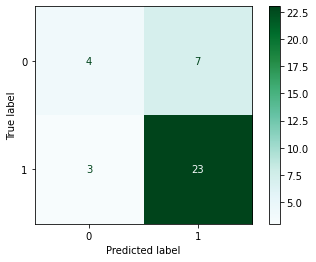

In [68]:
# Feature Selection and Train/Test split

X = titanic_df2[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']]
y = titanic_df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Initialise Decision Tree Classifier
DecisionTreeClassificationCV = DecisionTreeClassifier()

# Hyperparameter Tuning
parameters = {'max_depth':        [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [5, 10, 20]}  

DecisionTreeClassificationModelCV = GridSearchCV(estimator = DecisionTreeClassificationCV, param_grid = parameters, cv=5, scoring = 'recall')

# Fit and Predict
DecisionTreeClassificationModelCV.fit(X_train, y_train)
y_pred = DecisionTreeClassificationModelCV.predict(X_test)

# 4) Evaluate model performance
AccuracyScoreDecisionTreeCV = accuracy_score(y_test,y_pred)
PrecisionScoreDecisionTreeCV = precision_score(y_test, y_pred)
RecallScoreDecisionTreeCV = recall_score(y_test, y_pred)
F1ScoreDecisionTreeCV = f1_score(y_test, y_pred)
ROC_AUC_SCORE_DecisionTreeCV = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score (Decision Tree CV): {AccuracyScoreDecisionTreeCV:.4f}')
print(f'Precision Score (Decision Tree CV): {PrecisionScoreDecisionTreeCV}')
print(f'Recall Score (Decision Tree CV): {RecallScoreDecisionTreeCV}')
print(f'F1 Score (Decision Tree CV): {F1ScoreDecisionTreeCV}')
print(f'ROC AUC Score (Decision Tree CV): {ROC_AUC_SCORE_DecisionTreeCV}')

# Plotting the Confusion Matrix
fig, ax = plt.subplots()
g4=ConfusionMatrixDisplay.from_predictions( y_test, y_pred, ax = ax, cmap = 'BuGn')


---
#### Random Forest Classification - without GridSearchCV

In [69]:
# Feature Selection and Train/Test split

X = titanic_df2[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']]
y = titanic_df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Initialise Decision Tree Classifier
RandomForestClassification = DecisionTreeClassifier()

# Fit and Predict
RandomForestClassification.fit(X_train, y_train)
y_pred = RandomForestClassification.predict(X_test)

# 4) Evaluate model performance
AccuracyScoreRandomForest = accuracy_score(y_test,y_pred)
PrecisionScoreRandomForest = precision_score(y_test, y_pred)
RecallScoreRandomForest = recall_score(y_test, y_pred)
F1ScoreRandomForest = f1_score(y_test, y_pred)
ROC_AUC_SCORE_RandomForest = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score (Random Forest): {AccuracyScoreRandomForest:.4f}')
print(f'Precision Score (Random Forest): {PrecisionScoreRandomForest}')
print(f'Recall Score (Random Forest): {RecallScoreRandomForest}')
print(f'F1 Score (Random Forest): {F1ScoreRandomForest}')
print(f'ROC AUC Score (Random Forest): {ROC_AUC_SCORE_RandomForest}')

Accuracy Score (Random Forest): 0.7568
Precision Score (Random Forest): 0.8695652173913043
Recall Score (Random Forest): 0.7692307692307693
F1 Score (Random Forest): 0.8163265306122449
ROC AUC Score (Random Forest): 0.7482517482517482


#### Random Forest Classification - with GridSearchCV

In [70]:
# Feature Selection and Train/Test split

X = titanic_df2[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']]
y = titanic_df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Initialise Decision Tree Classifier
RandomForestClassificationCV = RandomForestClassifier()

# Hyperparameter Tuning
parameters = {'max_depth':        [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [5, 10, 20],
              'n_estimators': [25,50,100,150]}   

RandomForestClassificationModelCV = GridSearchCV(estimator = RandomForestClassificationCV, param_grid = parameters, cv=5, scoring = 'recall')

# Fit and Predict
RandomForestClassificationModelCV.fit(X_train, y_train)
y_pred = RandomForestClassificationModelCV.predict(X_test)

# 4) Evaluate model performance
AccuracyScoreRandomForestCV = accuracy_score(y_test,y_pred)
PrecisionScoreRandomForestCV = precision_score(y_test, y_pred)
RecallScoreRandomForestCV = recall_score(y_test, y_pred)
F1ScoreRandomForestCV = f1_score(y_test, y_pred)
ROC_AUC_SCORE_RandomForestCV = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score (Random Forest): {AccuracyScoreRandomForestCV:.4f}')
print(f'Precision Score (Random Forest): {PrecisionScoreRandomForestCV}')
print(f'Recall Score (Random Forest): {RecallScoreRandomForestCV}')
print(f'F1 Score (Random Forest): {F1ScoreRandomForestCV}')
print(f'ROC AUC Score (Random Forest): {ROC_AUC_SCORE_RandomForestCV}')

Accuracy Score (Random Forest): 0.7568
Precision Score (Random Forest): 0.7741935483870968
Recall Score (Random Forest): 0.9230769230769231
F1 Score (Random Forest): 0.8421052631578947
ROC AUC Score (Random Forest): 0.6433566433566433


---
#### Gradient Boosting Classification - without GridSearchCV

In [71]:
# Feature Selection and Train/Test split

X = titanic_df2[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']]
y = titanic_df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Initialise Decision Tree Classifier
GradientBoostingClassification = XGBClassifier()

# Fit and Predict
GradientBoostingClassification.fit(X_train, y_train)
y_pred = GradientBoostingClassification.predict(X_test)

# 4) Evaluate model performance
AccuracyScoreGradientBoosting = accuracy_score(y_test,y_pred)
PrecisionScoreGradientBoosting = precision_score(y_test, y_pred)
RecallScoreGradientBoosting = recall_score(y_test, y_pred)
F1ScoreGradientBoosting = f1_score(y_test, y_pred)
ROC_AUC_SCORE_GradientBoosting = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score (Random Forest): {AccuracyScoreGradientBoosting:.4f}')
print(f'Precision Score (Random Forest): {PrecisionScoreGradientBoosting}')
print(f'Recall Score (Random Forest): {RecallScoreGradientBoosting}')
print(f'F1 Score (Random Forest): {F1ScoreGradientBoosting}')
print(f'ROC AUC Score (Random Forest): {ROC_AUC_SCORE_GradientBoosting}')

Accuracy Score (Random Forest): 0.7568
Precision Score (Random Forest): 0.8148148148148148
Recall Score (Random Forest): 0.8461538461538461
F1 Score (Random Forest): 0.8301886792452831
ROC AUC Score (Random Forest): 0.6958041958041957


#### Gradient Boosting Classification - with GridSearchCV

In [72]:
# Feature Selection and Train/Test split

X = titanic_df2[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']]
y = titanic_df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Initialise Decision Tree Classifier
GradientBoostingClassificationCV = XGBClassifier()

# Hyperparameter Tuning
parameters = {'max_depth': [2,3,4,5,6,7,8,9,10],
              'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2, 0.3],
              'n_estimators':[25,50,100,150]}

GradientBoostingClassificationModelCV = GridSearchCV(estimator = GradientBoostingClassificationCV, param_grid = parameters, cv=5, scoring = 'recall')

# Fit and Predict
GradientBoostingClassificationModelCV.fit(X_train, y_train)
y_pred = GradientBoostingClassificationModelCV.predict(X_test)

# 4) Evaluate model performance
AccuracyScoreGradientBoostingCV = accuracy_score(y_test,y_pred)
PrecisionScoreGradientBoostingCV = precision_score(y_test, y_pred)
RecallScoreGradientBoostingCV = recall_score(y_test, y_pred)
F1ScoreGradientBoostingCV = f1_score(y_test, y_pred)
ROC_AUC_SCORE_GradientBoostingCV = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score (Random Forest): {AccuracyScoreGradientBoostingCV:.4f}')
print(f'Precision Score (Random Forest): {PrecisionScoreGradientBoostingCV}')
print(f'Recall Score (Random Forest): {RecallScoreGradientBoostingCV}')
print(f'F1 Score (Random Forest): {F1ScoreGradientBoostingCV}')
print(f'ROC AUC Score (Random Forest): {ROC_AUC_SCORE_GradientBoostingCV}')

Accuracy Score (Random Forest): 0.7027
Precision Score (Random Forest): 0.7027027027027027
Recall Score (Random Forest): 1.0
F1 Score (Random Forest): 0.8253968253968254
ROC AUC Score (Random Forest): 0.5
